# Steo-1: Business Problem Understanding
- previously, we explored the relationship between total advertising spend and sales? as well as predicting the total sales dor some value of total spend
- what is the relationship between rach advertising channel(TV, radio, newpaper and sales?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:\ProgramData\Microsoft\Windows\Start Menu\Programs\Anaconda3 (64-bit)\Advertising.csv")
df.head()
"C:\ProgramData\Microsoft\Windows\Start Menu\Programs\Anaconda3 (64-bit)\diabetes.csv"

'C:\\ProgramData\\Microsoft\\Windows\\Start Menu\\Programs\\Anaconda3 (64-bit)\\diabetes.csv'

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   TV         200 non-null    int64
 1   radio      200 non-null    int64
 2   newspaper  200 non-null    int64
 3   sales      200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [4]:

df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [5]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147042.500000,23264.000000,30554.000000,14022.500000
std,85854.236315,14846.809176,21778.620839,5217.456566
min,700.000000,0.000000,300.000000,1600.000000
25%,74375.000000,9975.000000,12750.000000,10375.000000
50%,149750.000000,22900.000000,25750.000000,12900.000000
75%,218825.000000,36525.000000,45100.000000,17400.000000
max,296400.000000,49600.000000,114000.000000,27000.000000


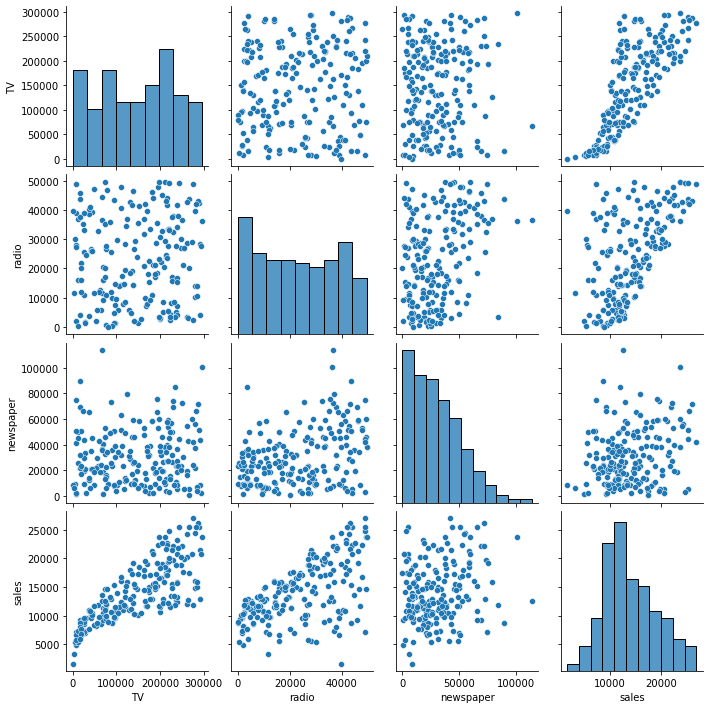

In [6]:
sns.pairplot(df)
plt.show()

In [7]:
df[['TV','radio','newspaper']] .corr()

,TV,radio,newspaper
TV,1.000000,0.054809,0.056648
radio,0.054809,1.000000,0.354104
newspaper,0.056648,0.354104,1.000000


In [8]:
X=df[['TV','radio','newspaper']]
y= df['sales']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=13)

In [12]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train, y_train)
print(model.coef_)
print(model.intercept_)

[ 0.045958    0.18546021 -0.00272911]
2996.463132658775


In [64]:
train_prediction=model.predict(X_train)
test_prediction=model.predict(X_test)

In [65]:
print('Train R2', model.score(X_train,y_train))
print('test R2', model.score(X_test,y_test))

Train R2 0.8869244310370576
test R2 0.9308589334107374


In [66]:
# check 2:  wether the test accuracy= cross validation score
from sklearn.model_selection import cross_val_score

scores=cross_val_score(model,X,y, cv=5)
print(scores)

print ('cross validation score:', scores.mean())

[0.87865198 0.91763212 0.92933032 0.81443904 0.89547829]
cross validation score: 0.8871063495438435


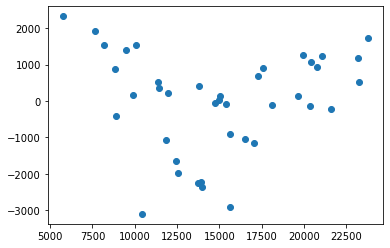

In [74]:
# 1. linearity of errors
error= y_test-test_prediction
plt.scatter(test_prediction, error)

plt.show()

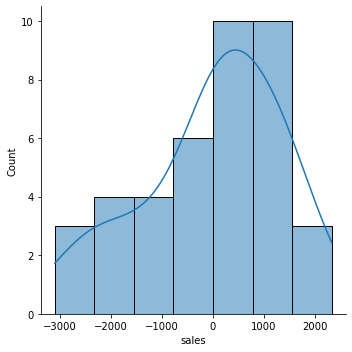

In [75]:
error.skew()
sns.displot(error,kde=True)
plt.show()

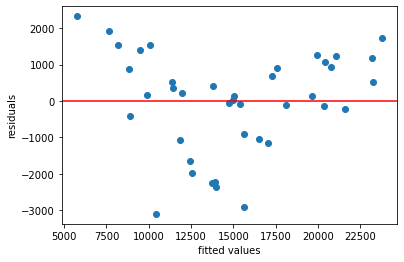

In [76]:
#3.  equal variance of errors

#observe number of errors above and below the line, then equal variance is present

plt.scatter(test_prediction, error)
plt.axhline(y=0,color='red')
plt.xlabel('fitted values')
plt.ylabel('residuals')
plt.show()

In [77]:
import statsmodels.formula.api as smf
model1=smf.ols('y~X',data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Mon, 25 Dec 2023   Prob (F-statistic):           4.83e-98
Time:                        22:26:23   Log-Likelihood:                -1767.7
No. Observations:                 200   AIC:                             3541.
Df Residuals:                     197   BIC:                             3551.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2921.0999    294.490      9.919      0.000    2340.343    3501.857
X[0]           0.0458      0.001     32.909      0.000       0.043       0.048
X[1]           0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                     4.25e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.25e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

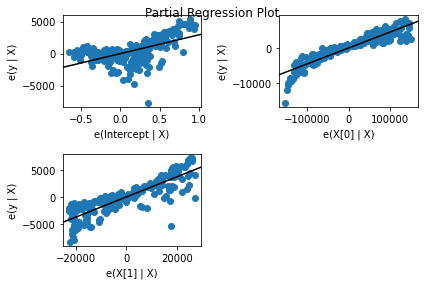

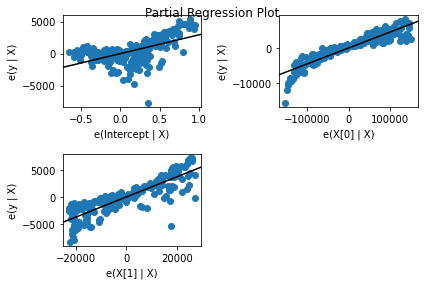

In [78]:
import statsmodels.api as sm
sm.graphics.plot_partregress_grid(model1)


In [73]:
X=df[['TV','radio']]
y= df['sales']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=9)

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train, y_train)
print(model.coef_)
print(model.intercept_)

train_prediction=model.predict(X_train)
test_prediction=model.predict(X_test)
print('Train R2', model.score(X_train,y_train))
print('test R2', model.score(X_test,y_test))
scores=cross_val_score(model,X,y, cv=5)

from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,X,y, cv=5)
print ('cross validation score:', scores.mean())

[0.04565331 0.18718911]
2957.3621138207127
Train R2 0.8897265958178805
test R2 0.9258743223517101
cross validation score: 0.889282957306453
